# Exercícios Programação Data Science - Utilizando Pandas
---


In [2]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format

## EX01

* Carregue para um DataFrame a lista de municípios de fronteira do Brasil utilizando o arquivo "arquivos/arq_municipios_fronteiricos.csv".

In [3]:
# Variavel contendo o nome do arquivo
arquivo = "arq_municipios_fronteiricos.csv"

# Complete o código abaixo para realizar a leitura do arquivo
# o arquivo utiliza tabulação como separador
# dentro de strings a tabulação é representada como \t

df = pd.read_csv(arquivo)

df.head()
# Visualize as 5 primeiras linhas do DataFrame



,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000
0,1 – Aceguá,Rio Grande do Sul,1.55,4.14,"2,66",71.638.000,17.266,ni
1,2 – Acrelândia,Acre,1.57,11.52,"7,31",114.350.000,9.986,"0,680"
2,3 – Alecrim,Rio Grande do Sul,315.00,7.36,"23,35",44.373.000,5.944,"0,743"
3,4 – Almeirim,Pará,72.96,30.90,"0,42",462.258.000,13.485,"0,745"
4,5 – Alta Floresta d'Oeste,Rondônia,7.07,23.86,"3,37",186.812.000,6.525,"0,715"


* Realize um tratamento na coluna Município para remover os números e hífens.
    * primeiro crie uma função recebe uma string com o nome do município, realiza a remoção dos números e hifens e retorna a nova string tratada
    * faça os testes com a sua função até que o resultado esteja satisfatório
    * passe a sua função como parâmetro para o método apply do DataFrame

In [ ]:
!head arq_municipios_fronteiricos.csv

In [4]:
# função que irá realizar o tratamento para um município
def tratar_nome_municipio(nome_municipio):
    #realize a limpeza
    nome_municipio_tratado = re.sub(r'([\d]* [–-] )(.*)', r'\2', nome_municipio)    
    return nome_municipio_tratado

# faça um teste de sua função para verificar se a transformação está correta

for i in df['Município']:
    try:
        print(tratar_nome_municipio(i))
    except:
        pass

Aceguá
Acrelândia
Alecrim
Almeirim
Alta Floresta d'Oeste
Alto Alegre
Alto Alegre dos Parecis
Amajari
Antônio João
Aral Moreira
Assis Brasil
Atalaia do Norte
Bagé
Bandeirante
Barcelos
Barra do Quaraí
Barracão
Bela Vista
Belmonte
Benjamin Constant
Bom Jesus do Sul
Bonfim
Brasiléia
Cabixi
Cáceres
Capanema
Capixaba
Caracaraí
Caracol
Caroebe
Chuí
Comodoro
Coronel Sapucaia
Corumbá
Costa Marques
Crissiumal
Cruzeiro do Sul
Derrubadas
Dionísio Cerqueira
Dom Pedrito
Doutor Maurício Cardoso
Entre Rios do Oeste
Epitaciolândia
Esperança do Sul
Feijó
Foz do Iguaçu
Garruchos
Guaíra
Guajará
Guajará Mirim
Guaraciaba
Herval
Iracema
Itaipulândia
Itapiranga
Itaqui
Jaguarão
Japorã
Japurá
Jordão
Laranjal do Jari
Mâncio Lima
Manoel Urbano
Marechal Rondon
Marechal Thaumaturgo
Mercedes
Mundo Novo
Normandia
Novo Machado
Nova Mamoré
Óbidos
Oiapoque
Oriximiná
Pacaraima
Paraíso
Paranhos
Pato Bragado
Pedras Altas
Pérola d'Oeste
Pimenteiras do Oeste
Pirapó
Plácido de Castro
Planalto
Poconé
Ponta Porã
Porto Esperidiã

In [5]:
# aplique a função utilizando o método apply

#df['Município'].apply(lambda x: re.sub(r'([\d]* [–-] )(.*)', r'\2', x))

df['Município'] = df['Município'].apply(tratar_nome_municipio)

In [6]:
# exiba todos os dados e verifique se o resultado está correto
df.head()

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000
0,Aceguá,Rio Grande do Sul,1.55,4.14,"2,66",71.638.000,17.266,ni
1,Acrelândia,Acre,1.57,11.52,"7,31",114.350.000,9.986,"0,680"
2,Alecrim,Rio Grande do Sul,315.00,7.36,"23,35",44.373.000,5.944,"0,743"
3,Almeirim,Pará,72.96,30.90,"0,42",462.258.000,13.485,"0,745"
4,Alta Floresta d'Oeste,Rondônia,7.07,23.86,"3,37",186.812.000,6.525,"0,715"


Algumas linhas ainda possuem hífen e números?

In [ ]:
# problemas com caracteres são comuns
print(hex(ord('-'))) # código UTF8 do caracter (hexadecimal)
print(hex(ord('–'))) # código UTF8 do caracter (hexadecimal)
'-' == '–'

* HYPHEN-MINUS: __&#x2D;__
    * https://www.fileformat.info/info/unicode/char/2d/index.htm
* EN DASH: __&#x2013;__
    * https://www.fileformat.info/info/unicode/char/2013/index.htm

In [ ]:
# com todos os municípios devidamente tratados
# sobrescreva a coluna Município com os novos valores

# exiba as informações


## EX02

Ainda utilizando o DataFrame carregado no exercício anterior, verifique os tipos de dados das colunas do dataframe. Todos os dados numéricos deverão ser transformados para tipos numéricos.

* utilize o método info() do DataFrame para saber detalhes dos tipos de dados das colunas
* verifique se os números possuem os símbolos de decimal e separadores de milhar compatíveis com a linguagem. Se necessário, fazer as substituições pertinentes.

In [7]:
# verifique os tipos das colunas do DataFrame. Utilize o método info(): df_muni_front

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
Município                          122 non-null object
Estado                             122 non-null object
Área territorial                   122 non-null float64
População (IBGE/2007)              122 non-null float64
Densidade demográfica (hab/km2)    122 non-null object
PIB (IBGE/2005                     122 non-null object
PIB per capita (R$)                122 non-null object
IDH/2000                           122 non-null object
dtypes: float64(2), object(6)
memory usage: 7.7+ KB


In [ ]:
df.describe()

In [8]:
# faça a conversão do campo 'Área territorial'
def converter_para_float(texto):
    # faça as operações necessárias e 
    # devolva um objeto do tipo float
    # ou np.NaN (tipo Not a Number do numpy)
    t = texto.replace(' ','').replace('.','').replace(',','.');
    try:
        return float(t)
    except:
        return float("NaN")

# aplique a função de conversão utilizando o método apply na coluna 'Área territorial'
df['Densidade demográfica (hab/km2)'] = df['Densidade demográfica (hab/km2)'].apply(converter_para_float)
# exiba alguns valores da com valores convertidos


In [9]:
# substitua a coluna pelos valores convertidos


# faça o mesmo para a coluna PIB
df['PIB per capita (R$)'] = df['PIB per capita (R$)'].apply(converter_para_float)


In [ ]:
# imprima novamente as informações das colunas e verifique os tipos

df.info()

In [10]:
#PIB (IBGE/2005 
df['PIB (IBGE/2005'] = df['PIB (IBGE/2005'].apply(converter_para_float)

In [12]:
df['IDH/2000'] = df['IDH/2000'].apply(converter_para_float)

In [13]:
# imprima novamente as primeiras linhas do DataFrame
df.head()

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000
0,Aceguá,Rio Grande do Sul,1.55,4.14,2.66,"71,638,000.00","17,266.00",nan
1,Acrelândia,Acre,1.57,11.52,7.31,"114,350,000.00","9,986.00",0.68
2,Alecrim,Rio Grande do Sul,315.00,7.36,23.35,"44,373,000.00","5,944.00",0.74
3,Almeirim,Pará,72.96,30.90,0.42,"462,258,000.00","13,485.00",0.74
4,Alta Floresta d'Oeste,Rondônia,7.07,23.86,3.37,"186,812,000.00","6,525.00",0.71


## EX03



Crie uma coluna com a sigla dos estados.

* crie um set à partir da coluna Estados. Atribua a uma variável chamada __nomes_estados__.

In [14]:
# crie o set e verifique o seu conteúdo
Estados = set(df['Estado'])

Estados

# exiba o set gerado


{'Acre',
 'Amapá',
 'Amazonas',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Paraná',
 'Pará',
 'Rio Grande do Sul',
 'Rondônia',
 'Roraima',
 'Santa Cataria',
 'Santa Catarina'}

Você identificou um problema no nome dos estados?
Vamos corrigir no final.

* crie um dicionário onde o nome completo do estado é a chave e a sigla é o valor: __dic_nomes_siglas__

In [15]:
# crie o dicionário
dic_nomes_siglas = {
        "Acre": "AC",
        "Alagoas":"AL",
         "Amapá":"AP",
        "Amazonas":"AM",
        "Bahia":"BA",
        "Ceará":"CE",
        "Distrito Federal":"DF",
        "Espírito Santo":"ES",
        "Goiás":"GO",
        "Maranhão":"MA",
        "Mato Grosso":"MT",
        "Mato Grosso do Sul":"MS",
        "Minas Gerais":"MG",
        "Pará":"PA",
        "Paraíba":"PB",
        "Paraná":"PR",
        "Pernambuco":"PE",
        "Piauí":"PI",
        "Rio de Janeiro":"RJ",
        "Rio Grande do Norte":"RN",
        "Rio Grande do Sul":"RS",
        "Rondônia":"RO",
        "Roraima":"RR",
        "Santa Catarina":"SC",
        "São Paulo":"SP",
        "Sergipe":"SE",
        "Tocantins":"TO"
}

* utilize a função map do DataFrame para criar uma nova coluna de siglas à partir dos nomes dos estados. Passe o dicionário criado para a função map. Atribua a Série criada à variável __coluna_siglas_uf__.

In [16]:
# faça o mapeamento dos valores e atribua a : coluna_siglas_uf
df['coluna_siglas_uf'] = df['Estado'].map(dic_nomes_siglas)

# verifique os 10 primeiros itens criados
df.head()

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,coluna_siglas_uf
0,Aceguá,Rio Grande do Sul,1.55,4.14,2.66,"71,638,000.00","17,266.00",nan,RS
1,Acrelândia,Acre,1.57,11.52,7.31,"114,350,000.00","9,986.00",0.68,AC
2,Alecrim,Rio Grande do Sul,315.00,7.36,23.35,"44,373,000.00","5,944.00",0.74,RS
3,Almeirim,Pará,72.96,30.90,0.42,"462,258,000.00","13,485.00",0.74,PA
4,Alta Floresta d'Oeste,Rondônia,7.07,23.86,3.37,"186,812,000.00","6,525.00",0.71,RO


In [17]:
# crie a coluna sigla
#feito acima
# verifique as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Município                          122 non-null object
Estado                             122 non-null object
Área territorial                   122 non-null float64
População (IBGE/2007)              122 non-null float64
Densidade demográfica (hab/km2)    122 non-null float64
PIB (IBGE/2005                     122 non-null float64
PIB per capita (R$)                122 non-null float64
IDH/2000                           104 non-null float64
coluna_siglas_uf                   121 non-null object
dtypes: float64(6), object(3)
memory usage: 8.7+ KB


In [18]:
# verifique quantos registros possuem o nome do estado de Santa Catarina escrito errado "Santa Cataria"

df[df.Estado=='Santa Cataria']

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,coluna_siglas_uf
117,Tunápolis,Santa Cataria,133.00,4.65,34.96,"40,845,000.00","9,420.00",0.82,NaN


In [19]:
# faça a correção dos registros que possuem o nome do estado de Santa Catarina escrito errado
df['Estado'] = df['Estado'].replace(to_replace='Santa Cataria', value='Santa Catariana')

In [20]:
# verifique, novamente, quantos registros possuem o nome do estado de Santa Catarina escrito errado
df[df.Estado=='Santa Cataria']

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,coluna_siglas_uf


## EX04

Identifique quais municípios possuem 2 ou mais desvios na coluna PIB.

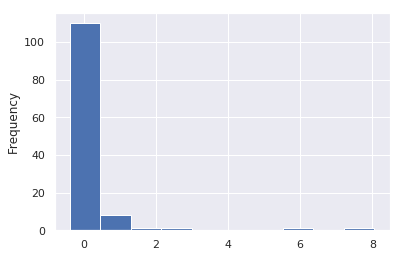

In [21]:
# normalize a coluna PIB em quantidade de desvios padrão
standarize = lambda x: (x-x.mean()) / x.std()
df['PIB_dvp'] = df['PIB (IBGE/2005'].pipe(standarize)
# exiba um histograma para as informações de PIB normalizado
df['PIB_dvp'].plot.hist()

In [22]:
# quais cidades possuem mais de 2 desvios 
df[(df.PIB_dvp > 2) | (df.PIB_dvp < -2)]

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,coluna_siglas_uf,PIB_dvp
33,Corumbá,Mato Grosso do Sul,65.30,114.28,1.74,"1,557,253,000.00","13,234.00",0.77,MS,2.32
45,Foz do Iguaçu,Paraná,618.00,311.34,503.70,"4,853,331,000.00","16,102.00",0.80,PR,8.05
89,Porto Velho,Rondônia,34.08,369.35,10.83,"3,656,512,000.00","9,779.00",0.76,RO,5.97


## EX05

Perguntas rápidas.

In [30]:
# quantos registros possuem NaN na coluna IDH/2000?
df[(df['IDH/2000'].isna()==True)].count()

Município                          18
Estado                             18
Área territorial                   18
População (IBGE/2007)              18
Densidade demográfica (hab/km2)    18
PIB (IBGE/2005                     18
PIB per capita (R$)                18
IDH/2000                            0
coluna_siglas_uf                   18
PIB_dvp                            18
dtype: int64

In [43]:
# quantas cidades por estado?
df2 = df[(df['IDH/2000'].isna()==True)]
s = df2.groupby(by=['Estado'])['PIB_dvp'].count()
s

Estado
Amapá                2
Amazonas             8
Rio Grande do Sul    2
Rondônia             4
Santa Catarina       2
Name: PIB_dvp, dtype: int64

In [47]:
# faça a ordenação do DataFrame pelo nome do município

df.sort_values(by=['Município'])
# a ordenação está correta?
#Não. A cidade de Óbidos, acentuada, ficou incorretame

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,coluna_siglas_uf,PIB_dvp
0,Aceguá,Rio Grande do Sul,1.55,4.14,2.66,"71,638,000.00","17,266.00",nan,RS,-0.26
1,Acrelândia,Acre,1.57,11.52,7.31,"114,350,000.00","9,986.00",0.68,AC,-0.18
2,Alecrim,Rio Grande do Sul,315.00,7.36,23.35,"44,373,000.00","5,944.00",0.74,RS,-0.31
3,Almeirim,Pará,72.96,30.90,0.42,"462,258,000.00","13,485.00",0.74,PA,0.42
4,Alta Floresta d'Oeste,Rondônia,7.07,23.86,3.37,"186,812,000.00","6,525.00",0.71,RO,-0.06
5,Alto Alegre,Roraima,25.57,14.39,0.56,"115,786,000.00","5,239.00",0.66,RR,-0.18
6,Alto Alegre dos Parecis,Rondônia,3.96,11.62,2.93,"90,226,000.00","6,001.00",nan,RO,-0.23
7,Amajari,Roraima,28.47,7.59,0.26,"31,897.00","5,240,000.00",0.65,RR,-0.38
8,Antônio João,Mato Grosso do Sul,1.14,8.35,7.29,"39,989,000.00","5,067.00",0.70,MS,-0.31
9,Aral Moreira,Mato Grosso do Sul,1.66,9.24,5.57,"105,697,000.00","13,132.00",0.72,MS,-0.20
